In [155]:
import subprocess
import matplotlib.pyplot as plt
import re

In [156]:
# Haskell GHCi commands to load functions and measure time
ghci_commands = """
:set +s
:l haskel/binomial.hs
--:l haskel/totient.hs
"""

# Function to run GHCi commands and extract execution times
def run_ghci_and_measure(command):
    process = subprocess.Popen(['ghci'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate(command.encode())
    output_lines = stdout.decode().splitlines()
    
    # Extract the time output (typically in the last line of GHCi output)
    last_line = output_lines[-4].strip()
    last_line = last_line.replace("(", "")
    last_line = last_line.replace(")", "")
    last_line_tokens = last_line.split()
    return float(last_line_tokens[-2])

In [157]:
# Function to run CLISP commands and extract execution times
def run_clisp_and_measure(command):
    process = subprocess.Popen(['clisp'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate(command.encode())
    output = stdout.decode()

    # Extract the time output from the CLISP output
    match = re.search(r'Run time: ([\d.]+E?[-\d]*) sec.', output)
    if match:
        time_seconds = float(match.group(1))
        return time_seconds
    else:
        raise ValueError("Unexpected CLISP output format or time not found")

# Lisp code to load the functions and measure time
lisp_setup = """
(load "lisp/binomial.lisp")
;(load "lisp/totient.lisp")
"""

# Function to generate Lisp command to measure execution time
def lisp_command_for_measurement2(function_name, n, k):
    return f"""
{lisp_setup}
(time ({function_name} {n} {k}))
"""

def lisp_command_for_measurement1(function_name, n):
    return f"""
{lisp_setup}
(time ({function_name} {n}))
"""

In [158]:
# Function to run SML commands and extract execution times
def run_sml_and_measure(command):
    process = subprocess.Popen(['sml'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate(command.encode())
    output = stdout.decode()

    # Extract the time output from the SML output
    match = re.search(r'Real: ([\d.]+)s', output)
    if match:
        time_seconds = float(match.group(1))
        return time_seconds
    else:
        raise ValueError("Unexpected SML output format or time not found")

# SML code to load the functions and measure time
sml_setup = """
use "sml/binomial.sml";
(*use "sml/totient.sml";*)
"""

# Function to generate SML command to measure execution time
def sml_command_for_measurement2(function_name, n, k):
    return f"""
{sml_setup}
val start = Time.now()
val _ = ({function_name} {n} {k});
val end' = Time.now()
val diff = Time.-(end', start)

val timer_result = (Time.toReal(diff));
val _ = print(concat["Real: ", Real.toString(timer_result), "s\\n"]);
"""

def sml_command_for_measurement1(function_name, n):
    return f"""
{sml_setup}
val start = Time.now()
val _ = ({function_name} {n});
val end' = Time.now()
val diff = Time.-(end', start)

val timer_result = (Time.toReal(diff));
val _ = print(concat["Real: ", Real.toString(timer_result), "s\\n"]);
"""


20
22
24


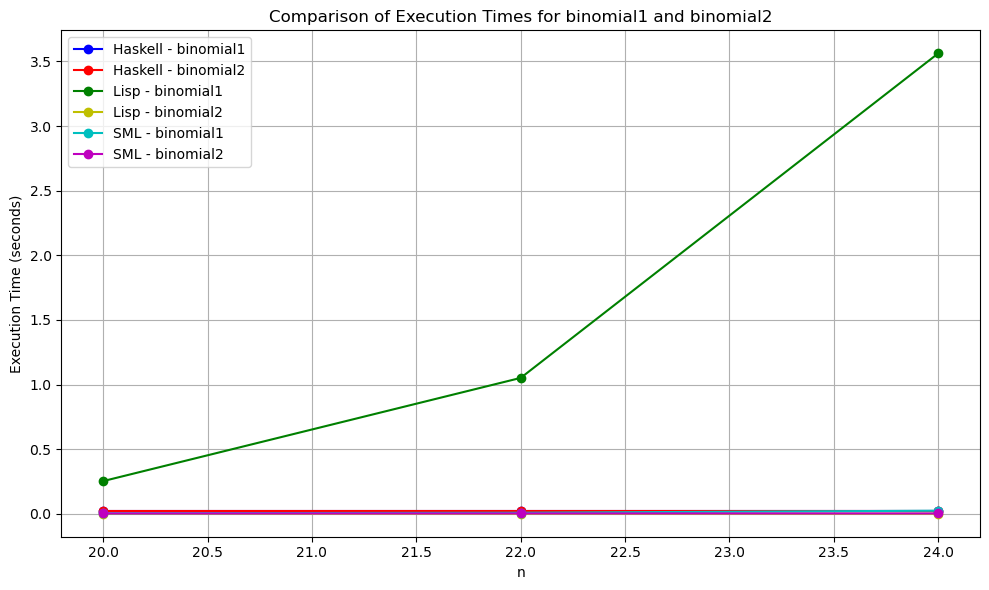

In [160]:
# Range of n values to test
n_values = list(range(20, 26, 2))
reps = 1

# Measure execution times for binomial1
times_haskell_binomial1 = []
times_haskell_binomial2 = []
times_lisp_binomial1 = []
times_lisp_binomial2 = []
times_sml_binomial1 = []
times_sml_binomial2 = []

for n in n_values:
    print(n)
    k = n // 2  # Choose k as n/2
    command_binomial1 = f"binomial1 {n} {k}"
    command_binomial2 = f"binomial2 {n} {k}"
    times_sum1 = 0
    times_sum2 = 0
    for i in range(reps):
        time_binomial1 = run_ghci_and_measure(ghci_commands + command_binomial1)
        time_binomial2 = run_ghci_and_measure(ghci_commands + command_binomial2)
        times_sum1 += time_binomial1
        times_sum2 += time_binomial2
    times_haskell_binomial1.append(times_sum1/reps)
    times_haskell_binomial2.append(times_sum2/reps)

    command_binomial1 = lisp_command_for_measurement2("binomial1", n, k)
    command_binomial2 = lisp_command_for_measurement2("binomial2", n, k)
    times_sum1 = 0
    times_sum2 = 0
    for i in range(reps):
        time_binomial1 = run_clisp_and_measure(command_binomial1)
        time_binomial2 = run_clisp_and_measure(command_binomial2)
        times_sum1 += time_binomial1
        times_sum2 += time_binomial2
    times_lisp_binomial1.append(times_sum1/reps)
    times_lisp_binomial2.append(times_sum2/reps)

    command_binomial1 = sml_command_for_measurement2("binomial1", n, k)
    command_binomial2 = sml_command_for_measurement2("binomial2", n, k)
    times_sum1 = 0
    times_sum2 = 0
    for i in range(reps):
        time_binomial1 = run_sml_and_measure(command_binomial1)
        time_binomial2 = run_sml_and_measure(command_binomial2)
        times_sum1 += time_binomial1
        times_sum2 += time_binomial2
    times_sml_binomial1.append(times_sum1/reps)
    times_sml_binomial2.append(times_sum2/reps)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, times_haskell_binomial1, marker='o', linestyle='-', color='b', label='Haskell - binomial1')
plt.plot(n_values, times_haskell_binomial2, marker='o', linestyle='-', color='r', label='Haskell - binomial2')
plt.plot(n_values, times_lisp_binomial1, marker='o', linestyle='-', color='g', label='Lisp - binomial1')
plt.plot(n_values, times_lisp_binomial2, marker='o', linestyle='-', color='y', label='Lisp - binomial2')
plt.plot(n_values, times_sml_binomial1, marker='o', linestyle='-', color='c', label='SML - binomial1')
plt.plot(n_values, times_sml_binomial2, marker='o', linestyle='-', color='m', label='SML - binomial2')
plt.xlabel('n')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times for binomial1 and binomial2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1000
11000
21000
31000
41000
51000
61000
71000
81000
91000


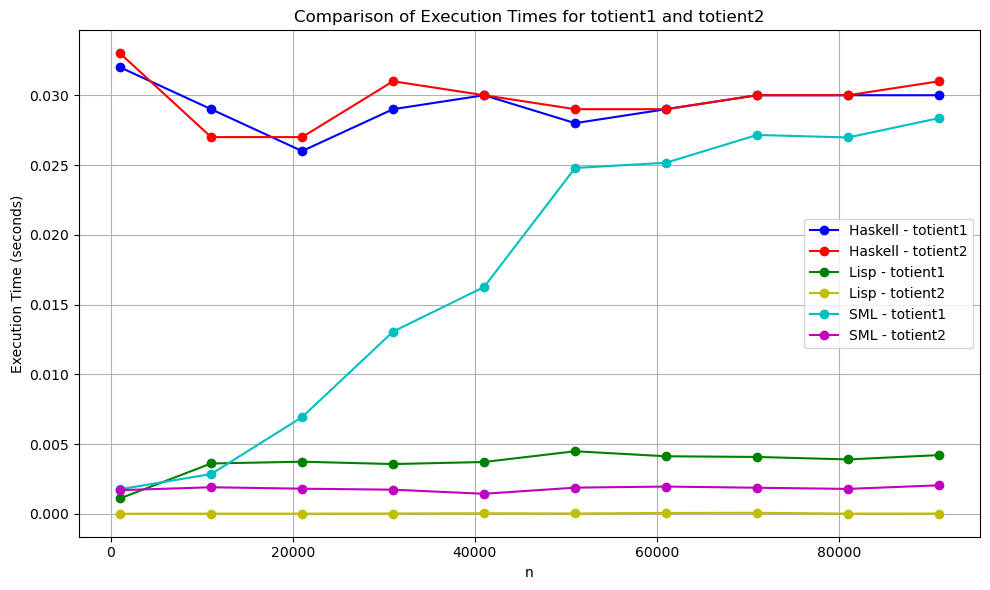

In [ ]:
n_values = list(range(1000, 101000, 10000))
reps = 10

# Measure execution times for totient
times_haskell_totient1 = []
times_haskell_totient2 = []
times_lisp_totient1 = []
times_lisp_totient2 = []
times_sml_totient1 = []
times_sml_totient2 = []

for n in n_values:
    print(n)
    command_totient1 = f"totient1 {n}"
    command_totient2 = f"totient2 {n}"
    times_sum1 = 0
    times_sum2 = 0
    for i in range(reps):
        time_totient1 = run_ghci_and_measure(ghci_commands + command_totient1)
        time_totient2 = run_ghci_and_measure(ghci_commands + command_totient2)
        times_sum1 += time_totient1
        times_sum2 += time_totient2
    times_haskell_totient1.append(times_sum1/reps)
    times_haskell_totient2.append(times_sum2/reps)

    command_totient1 = lisp_command_for_measurement1("totient1", n)
    command_totient2 = lisp_command_for_measurement1("totient2", n)
    times_sum1 = 0
    times_sum2 = 0
    for i in range(reps):
        time_totient1 = run_clisp_and_measure(command_totient1)
        time_totient2 = run_clisp_and_measure(command_totient2)
        times_sum1 += time_totient1
        times_sum2 += time_totient2
    times_lisp_totient1.append(times_sum1/reps)
    times_lisp_totient2.append(times_sum2/reps)

    command_totient1 = sml_command_for_measurement1("totient1", n)
    command_totient2 = sml_command_for_measurement1("totient2", n)
    times_sum1 = 0
    times_sum2 = 0
    for i in range(reps):
        time_totient1 = run_sml_and_measure(command_totient1)
        time_totient2 = run_sml_and_measure(command_totient2)
        times_sum1 += time_totient1
        times_sum2 += time_totient2
    times_sml_totient1.append(times_sum1/reps)
    times_sml_totient2.append(times_sum2/reps)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, times_haskell_totient1, marker='o', linestyle='-', color='b', label='Haskell - totient1')
plt.plot(n_values, times_haskell_totient2, marker='o', linestyle='-', color='r', label='Haskell - totient2')
plt.plot(n_values, times_lisp_totient1, marker='o', linestyle='-', color='g', label='Lisp - totient1')
plt.plot(n_values, times_lisp_totient2, marker='o', linestyle='-', color='y', label='Lisp - totient2')
plt.plot(n_values, times_sml_totient1, marker='o', linestyle='-', color='c', label='SML - totient1')
plt.plot(n_values, times_sml_totient2, marker='o', linestyle='-', color='m', label='SML - totient2')
plt.xlabel('n')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times for totient1 and totient2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()